# Understanding the data

In this first part, we load the data and perform some initial exploration on it. The main goal of this step is to acquire some basic knowledge about the data, how the various features are distributed, if there are missing values in it and so on.

In [0]:
### imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# load hourly data
hourly_data = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter01/data/hour.csv')

Check data format, number of missing values in the data and general statistics:

In [0]:
# print some generic statistics about the data
print(f"Shape of data: {hourly_data.shape}")
print(f"Number of missing values in the data: {hourly_data.isnull().sum().sum()}")

# get statistics on the numerical columns
hourly_data.describe().T

Shape of data: (17379, 17)
Number of missing values in the data: 0


,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [0]:
# create a copy of the original data
preprocessed_data = hourly_data.copy()

# tranform seasons
seasons_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: seasons_mapping[x])

# transform yr
yr_mapping = {0: 2011, 1: 2012}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x: yr_mapping[x])

# transform weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(lambda x: weekday_mapping[x])

# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(lambda x: weather_mapping[x]) 

# transorm hum and windspeed
preprocessed_data['hum'] = preprocessed_data['hum']*100
preprocessed_data['windspeed'] = preprocessed_data['windspeed']*67

# visualize preprocessed columns
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,spring,2012,Friday,cloudy,89.0,12.9980
3262,spring,2011,Friday,clear,64.0,7.0015
10763,spring,2012,Thursday,clear,42.0,23.9994
12384,spring,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


### Registered vs casual use analysis

In [0]:
# assert that total numer of rides is equal to the sum of registered and casual ones
assert (preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt).all(), \
'Sum of casual and registered rides not equal to total number of rides'

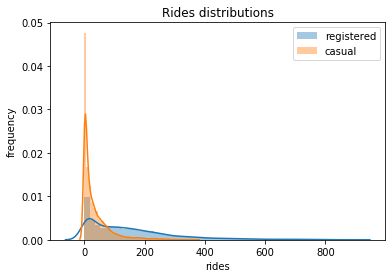

In [0]:
# plot distributions of registered vs casual rides
sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.ylabel("frequency")
plt.title("Rides distributions")
plt.savefig('figs/rides_distributions.png', format='png')

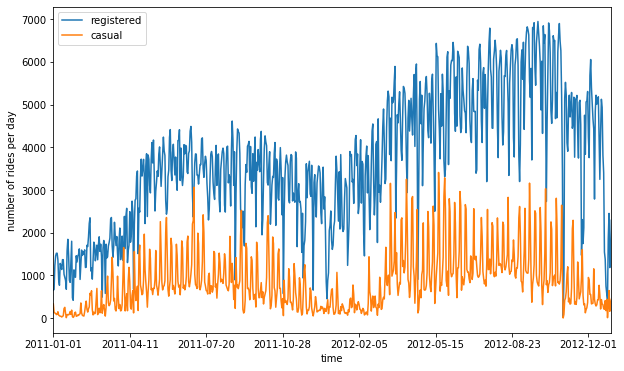

In [0]:
# plot evolution of rides over time
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");

plt.savefig('figs/rides_daily.png', format='png')

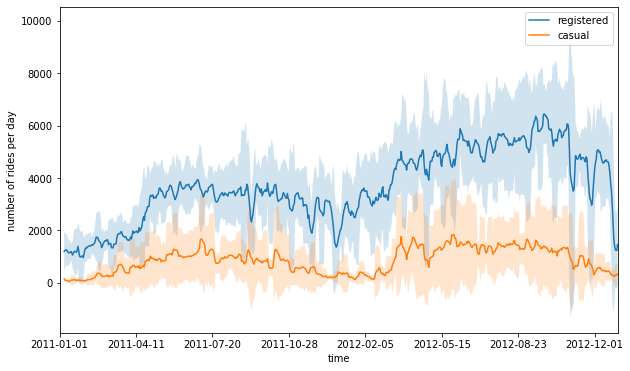

In [0]:
# create new dataframe with necessary for plotting columns, and 
# obtain number of rides per day, by grouping over each day
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()

# define window for computing the rolling mean and standard deviation
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

# create a plot of the series, where we first plot the series of rolling means, 
# then we color the zone between the series of rolling means 
# +- 2 rolling standard deviations
ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, \
                rolling_means['registered'] + 2*rolling_deviations['registered'], \
                rolling_means['registered'] - 2*rolling_deviations['registered'], \
                alpha = 0.2)
ax.fill_between(rolling_means.index, \
                rolling_means['casual'] + 2*rolling_deviations['casual'], \
                rolling_means['casual'] - 2*rolling_deviations['casual'], \
                alpha = 0.2)
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.savefig('figs/rides_aggregated.png', format='png')

/Users/kosta/projects/packt-book/book-env/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


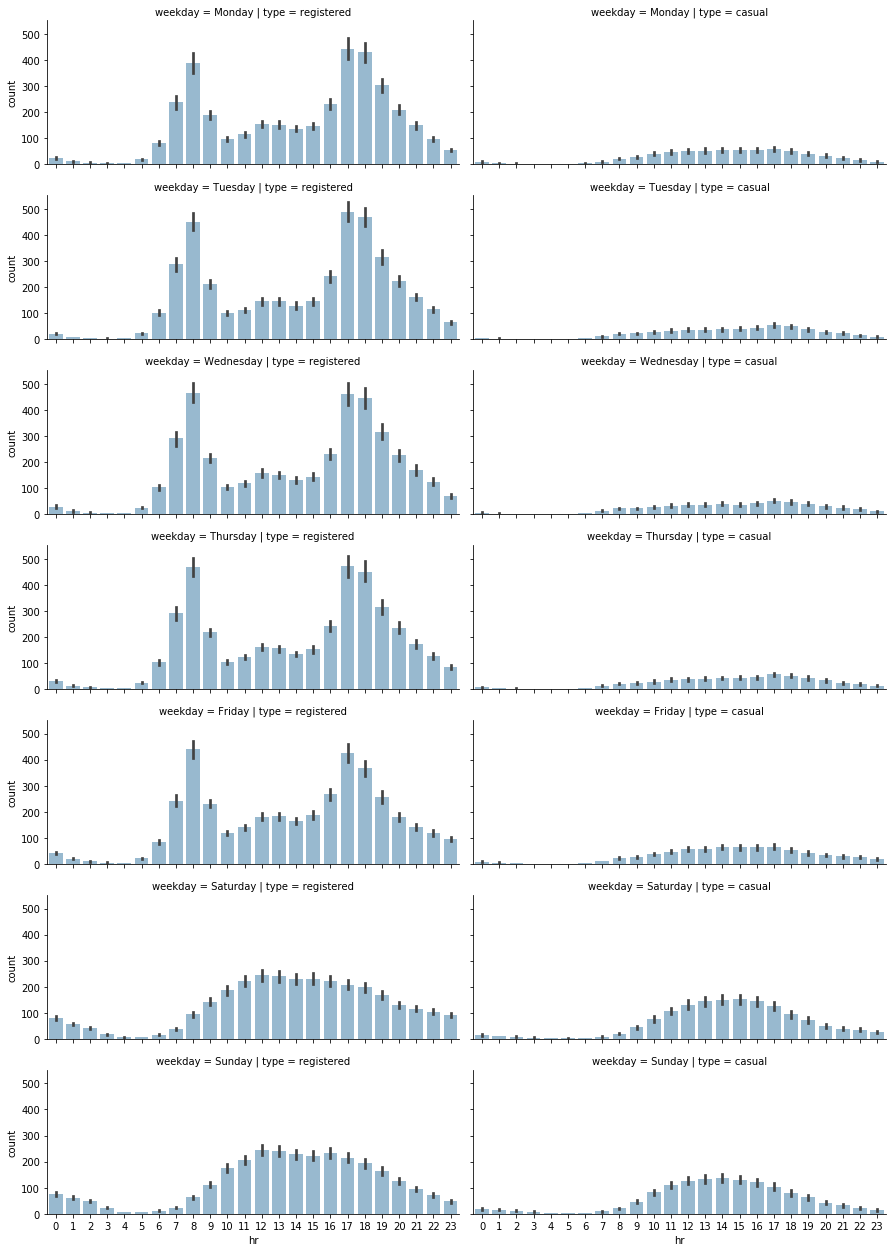

In [0]:
# select relevant columns
plot_data = preprocessed_data[['hr', 'weekday', 'registered', 'casual']]

# transform the data into a format, in number of entries are computed as count,
# for each distinct hr, weekday and type (registered or casual)
plot_data = plot_data.melt(id_vars=['hr', 'weekday'], var_name='type', value_name='count')

# create FacetGrid object, in which a grid plot is produced. 
# As columns, we have the various days of the week,
# as rows, the different types (registered and casual)
grid = sns.FacetGrid(plot_data, row='weekday', col='type', height=2.5,\
                     aspect=2.5, row_order=['Monday', 'Tuesday', \
                                            'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# populate the FacetGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
grid.savefig('figs/weekday_hour_distributions.png', format='png')

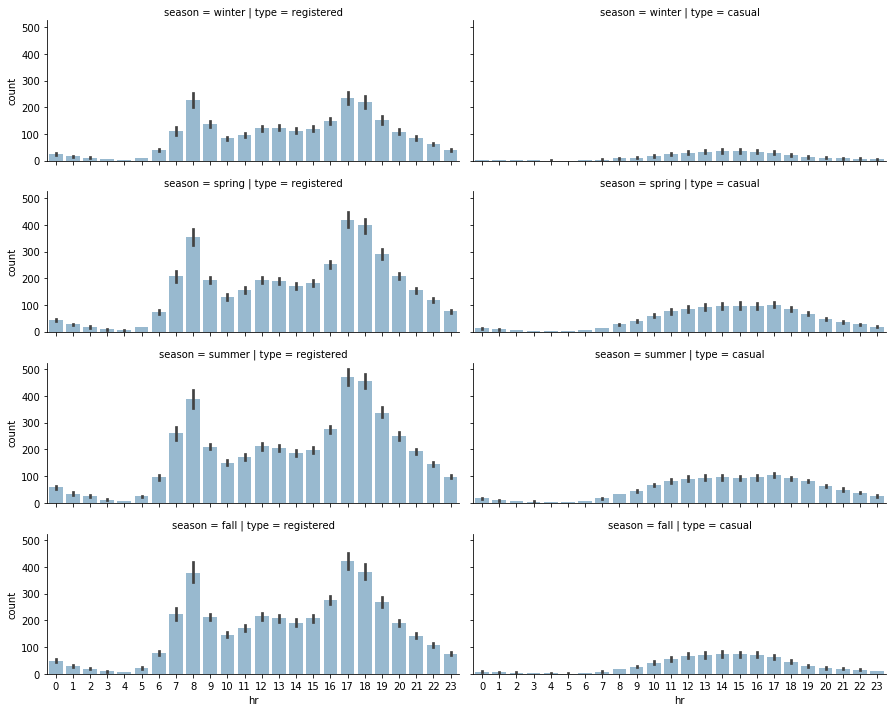

In [0]:
# select subset of the data
plot_data = preprocessed_data[['hr', 'season', 'registered', 'casual']]

# unpivot data from wide to long format
plot_data = plot_data.melt(id_vars=['hr', 'season'], var_name='type', \
                           value_name='count')

# define FacetGrid
grid = sns.FacetGrid(plot_data, row='season', \
                     col='type', height=2.5, aspect=2.5, \
                     row_order=['winter', 'spring', 'summer', 'fall'])

# apply plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)

# save figure
grid.savefig('figs/exercise_1_02_a.png', format='png')

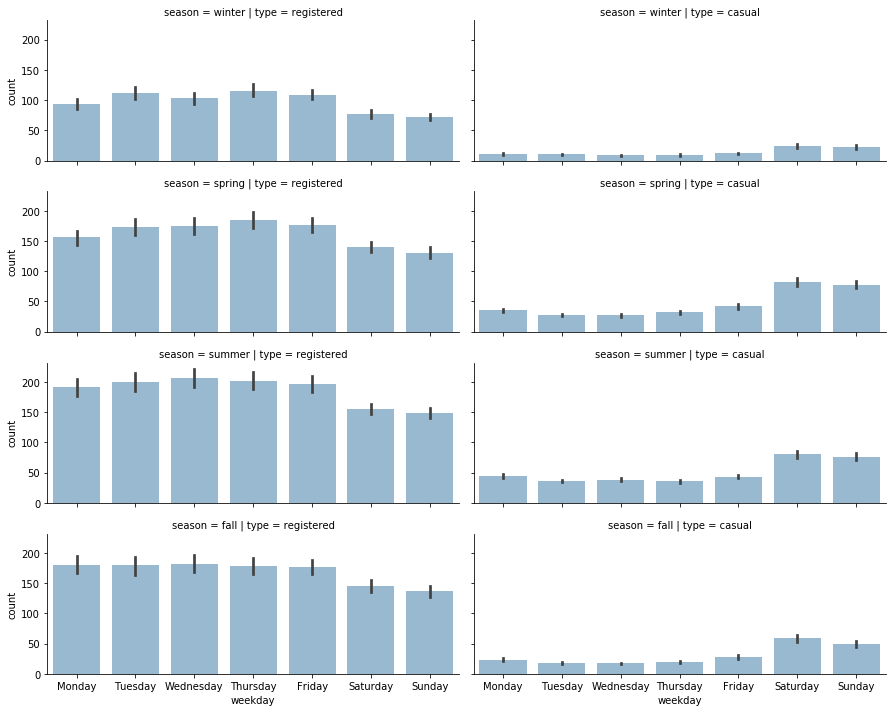

In [0]:
plot_data = preprocessed_data[['weekday', 'season', 'registered', 'casual']]
plot_data = plot_data.melt(id_vars=['weekday', 'season'], var_name='type', value_name='count')

grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5, 
                     row_order=['winter', 'spring', 'summer', 'fall'])
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5, 
         order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# save figure
grid.savefig('figs/exercise_1_02_b.png', format='png')

In [0]:
# compute population mean of registered rides
population_mean = preprocessed_data.registered.mean()

# get sample of the data (summer 2011)
sample = preprocessed_data[(preprocessed_data.season == "summer") &\
                               (preprocessed_data.yr == 2011)].registered

# perform t-test and compute p-value
from scipy.stats import ttest_1samp
test_result = ttest_1samp(sample, population_mean)
print(f"Test statistic: {test_result[0]:.03f}, p-value: {test_result[1]:.03f}")

# get sample as 5% of the full data
import random
random.seed(111)
sample_unbiased = preprocessed_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, population_mean)
print(f"Unbiased test statistic: {test_result_unbiased[0]:.03f}, p-value: {test_result_unbiased[1]:.03f}")

Test statistic: -3.492, p-value: 0.000
Unbiased test statistic: -0.460, p-value: 0.645


Statistic value: -16.004, p-value: 0.000


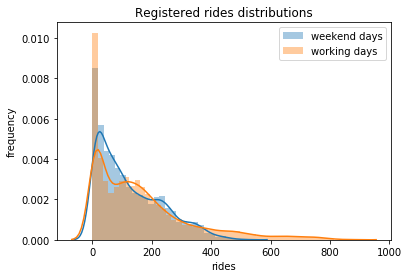

In [0]:
# define mask, indicating if the day is weekend or work day
weekend_days = ['Saturday', 'Sunday']
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingdays_mask = ~preprocessed_data.weekday.isin(weekend_days)

# select registered rides for the weekend and working days
weekend_data = preprocessed_data.registered[weekend_mask]
workingdays_data = preprocessed_data.registered[workingdays_mask]

# perform ttest
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

# plot distributions of registered rides for working vs weekend days
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Registered rides distributions")
plt.savefig('figs/exercise_1_04_a.png', format='png')

Statistic value: 41.077, p-value: 0.000


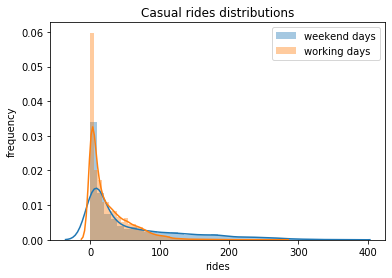

In [0]:
# select casual rides for the weekend and working days
weekend_data = preprocessed_data.casual[weekend_mask]
workingdays_data = preprocessed_data.casual[workingdays_mask]

# perform ttest
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"Statistic value: {test_res[0]:.03f}, p-value: {test_res[1]:.03f}")

# plot distributions of casual rides for working vs weekend days
sns.distplot(weekend_data, label='weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Casual rides distributions")
plt.savefig('figs/exercise_1_04_b.png', format='png')

# Analysis of weather related features

In [0]:
def plot_correlations(data, col):
    # get correlation between col and registered rides
    corr_r = np.corrcoef(data[col], data["registered"])[0,1]
    ax = sns.regplot(x=col, y="registered", data=data, scatter_kws={"alpha":0.05}, 
                     label=f"Registered rides (correlation: {corr_r:.3f})")
    
    # get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data["casual"])[0,1]
    ax = sns.regplot(x=col, y='casual', data=data, scatter_kws={"alpha":0.05}, 
                    label=f"Casual rides (correlation: {corr_c:.3f})")
    
    #adjust legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles: 
        lh.set_alpha(0.5)
        
    ax.set_ylabel("rides")
    ax.set_title(f"Correlation between rides and {col}")
    return ax

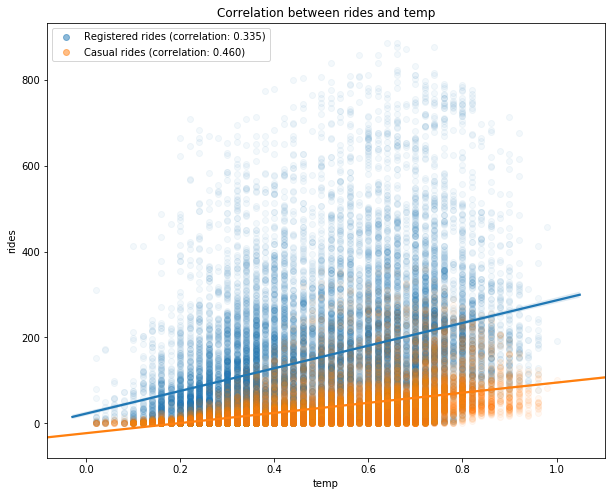

In [0]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'temp')
plt.savefig('figs/correlation_temp.png', format='png')

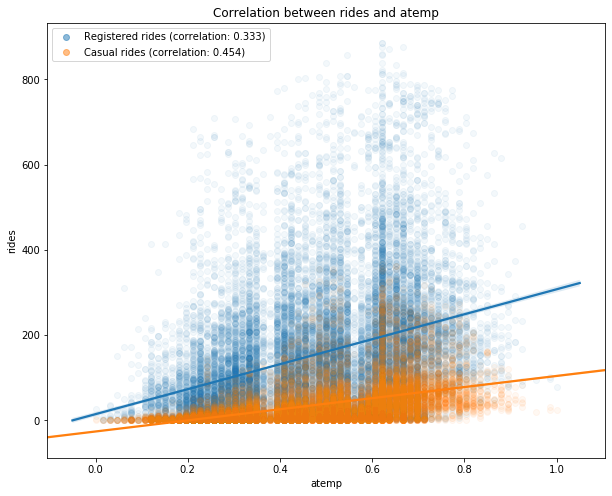

In [0]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'atemp')
plt.savefig('figs/correlation_atemp.png', format='png')

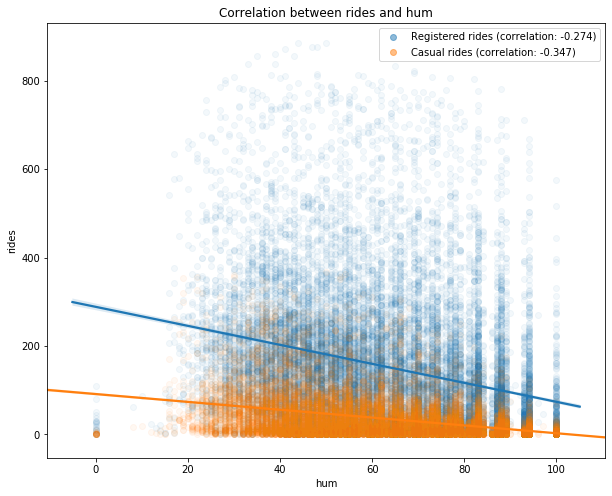

In [0]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'hum')
plt.savefig('figs/correlation_hum.png', format='png')

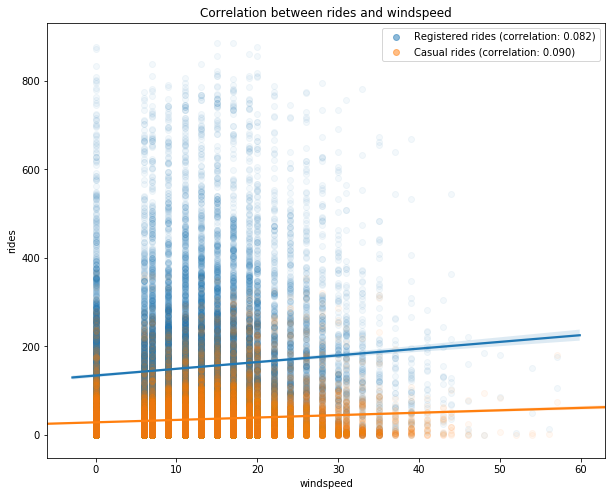

In [0]:
plt.figure(figsize=(10,8))
ax = plot_correlations(preprocessed_data, 'windspeed')
plt.savefig('figs/correlation_windspeed.png', format='png')

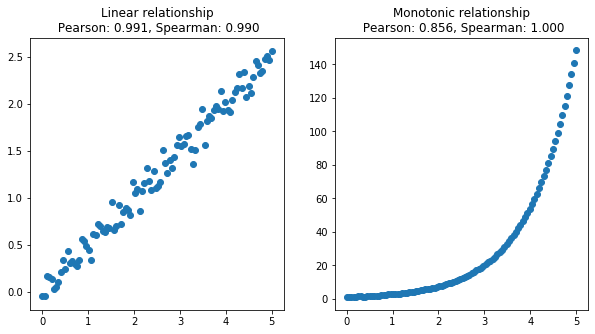

In [0]:
from scipy.stats import pearsonr, spearmanr

# define random variables
x = np.linspace(0,5, 100)
y_lin = 0.5*x + 0.1*np.random.randn(100)
y_mon = np.exp(x) + 0.1*np.random.randn(100)

# compute correlations
corr_lin_pearson = pearsonr(x, y_lin)[0]
corr_lin_spearman = spearmanr(x, y_lin)[0]
corr_mon_pearson = pearsonr(x, y_mon)[0]
corr_mon_spearman = spearmanr(x, y_mon)[0]

# visualize variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(x, y_lin)
ax1.set_title(f"Linear relationship\n Pearson: {corr_lin_pearson:.3f}, Spearman: {corr_lin_spearman:.3f}")
ax2.scatter(x, y_mon)
ax2.set_title(f"Monotonic relationship\n Pearson: {corr_mon_pearson:.3f}, Spearman: {corr_mon_spearman:.3f}")
fig.savefig('figs/exercise_1_05.png', format='png')

In [0]:
# define function for computing correlations
def compute_correlations(data, col):
    pearson_reg = pearsonr(data[col], data["registered"])[0]
    pearson_cas = pearsonr(data[col], data["casual"])[0]
    spearman_reg = spearmanr(data[col], data["registered"])[0]
    spearman_cas = spearmanr(data[col], data["casual"])[0]

    return pd.Series({"Pearson (registered)": pearson_reg, 
                      "Spearman (registered)": spearman_reg,
                      "Pearson (casual)": pearson_cas, 
                      "Spearman (casual)": spearman_cas})

# compute correlation measures between different features
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data = pd.DataFrame(index=["Pearson (registered)", "Spearman (registered)", "Pearson (casual)", "Spearman (casual)"])

for col in cols:
    corr_data[col] =  compute_correlations(preprocessed_data, col)
    
corr_data.T

,Pearson (registered),Spearman (registered),Pearson (casual),Spearman (casual)
temp,0.335361,0.373196,0.459616,0.570989
atemp,0.332559,0.373014,0.454080,0.570419
hum,-0.273933,-0.338480,-0.347028,-0.388213
windspeed,0.082321,0.122936,0.090287,0.122920


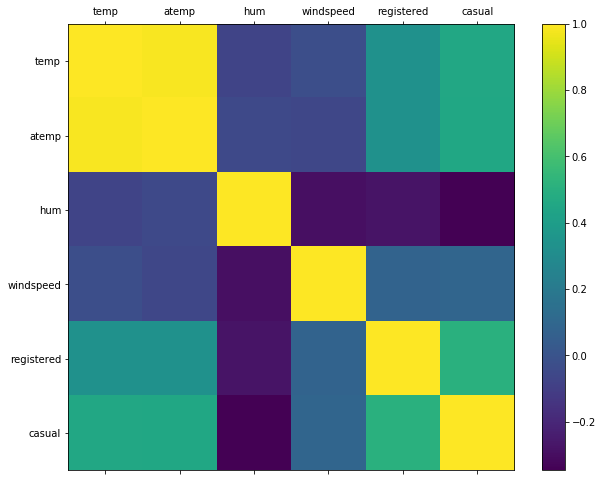

In [0]:
# plot correlation matrix
cols = ["temp", "atemp", "hum", "windspeed", "registered", "casual"]
plot_data = preprocessed_data[cols]
corr = plot_data.corr()

fig = plt.figure(figsize=(10,8))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])
fig.savefig('figs/correlations.png', format='png')

## Time series analysis

In [0]:
# get daily rides
daily_rides = preprocessed_data[["dteday", "registered", "casual"]]
daily_rides = daily_rides.groupby("dteday").sum()

# convert index to DateTime object
daily_rides.index = pd.to_datetime(daily_rides.index)

In [0]:
# define function for plotting rolling statistics and ADF test for time series
from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts, window=10, **kwargs):
    # create dataframe for plotting
    plot_data = pd.DataFrame(ts)
    plot_data['rolling_mean'] = ts.rolling(window).mean()
    plot_data['rolling_std'] = ts.rolling(window).std()

    # compute p-value of Dickey-Fuller test
    p_val = adfuller(ts)[1]

    ax = plot_data.plot(**kwargs)
    ax.set_title(f"Dickey-Fuller p-value: {p_val:.3f}")

<Figure size 432x288 with 0 Axes>

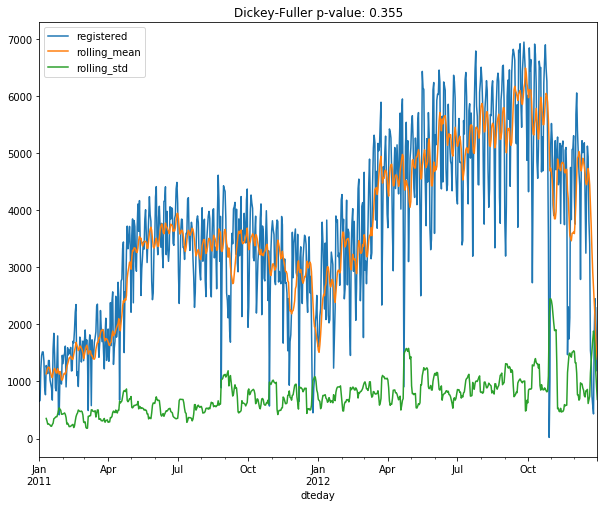

In [0]:
plt.figure()
test_stationarity(daily_rides["registered"], figsize=(10, 8))
plt.savefig('figs/daily_registered_original.png', format='png')

<Figure size 432x288 with 0 Axes>

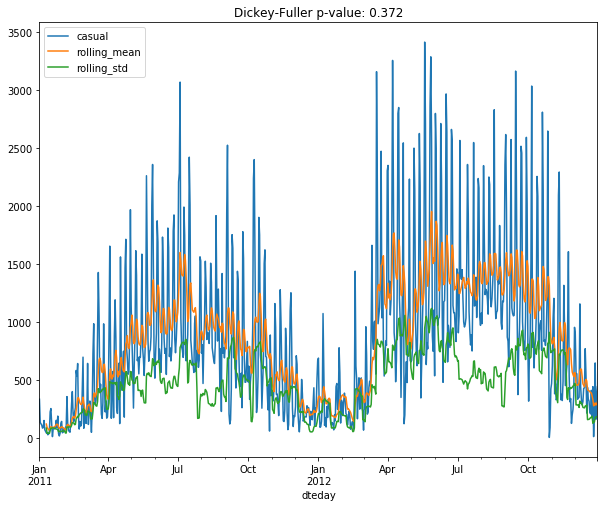

In [0]:
plt.figure()
test_stationarity(daily_rides["casual"], figsize=(10, 8))
plt.savefig('figs/daily_casual_original.png', format='png')

In [0]:
# make time series stationary
registered = daily_rides["registered"]
registered_ma = registered.rolling(10).mean()
registered_ma_diff = registered - registered_ma
registered_ma_diff.dropna(inplace=True)

casual = daily_rides["casual"]
casual_ma = casual.rolling(10).mean()
casual_ma_diff = casual - casual_ma
casual_ma_diff.dropna(inplace=True)

<Figure size 432x288 with 0 Axes>

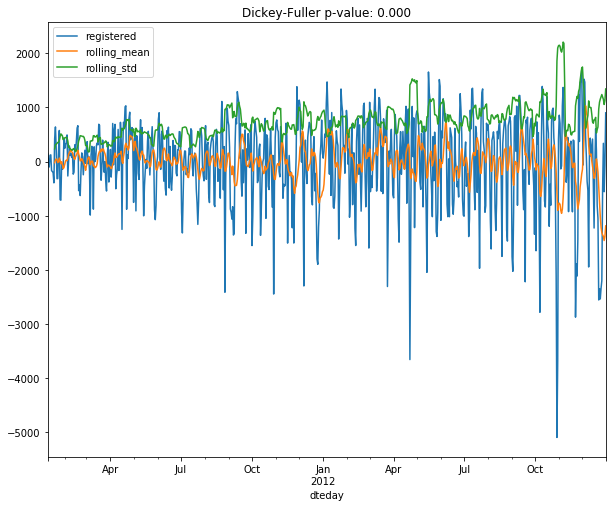

In [0]:
plt.figure()
test_stationarity(registered_ma_diff, figsize=(10, 8))
plt.savefig('figs/daily_registered_ma_diff.png', format='png')

<Figure size 432x288 with 0 Axes>

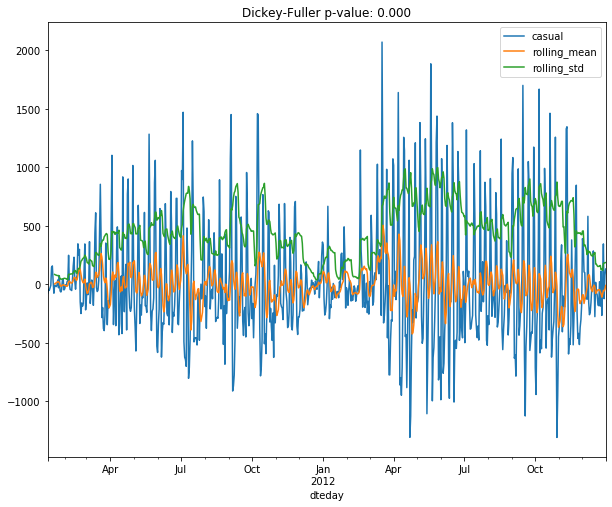

In [0]:
plt.figure()
test_stationarity(casual_ma_diff, figsize=(10, 8))
plt.savefig('figs/daily_casual_ma_diff.png', format='png')

In [0]:
# subtract last value
registered = daily_rides["registered"]
registered_diff = registered - registered.shift()
registered_diff.dropna(inplace=True)

casual = daily_rides["casual"]
casual_diff = casual - casual.shift()
casual_diff.dropna(inplace=True)

<Figure size 432x288 with 0 Axes>

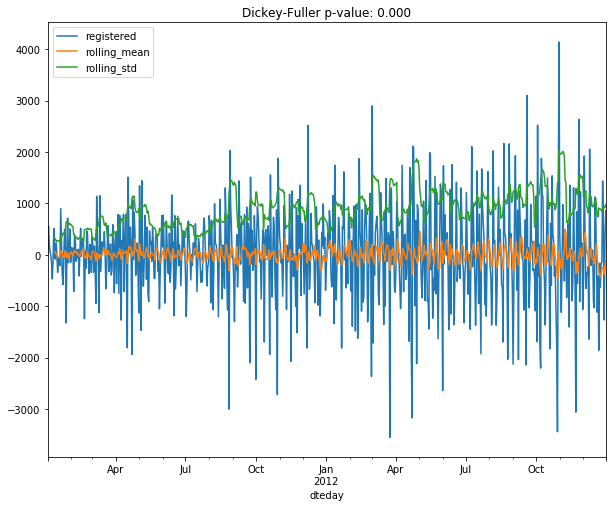

In [0]:
plt.figure()
test_stationarity(registered_diff, figsize=(10, 8))
plt.savefig('figs/daily_registered_diff.png', format='png')

<Figure size 432x288 with 0 Axes>

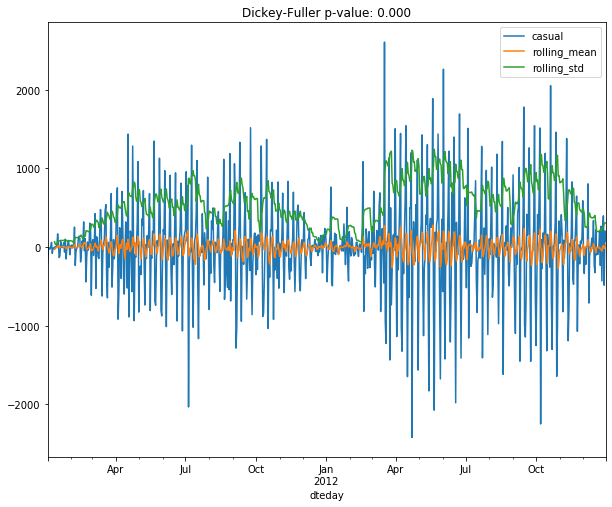

In [0]:
plt.figure()
test_stationarity(casual_diff, figsize=(10, 8))
plt.savefig('figs/daily_casual_diff.png', format='png')

*Exercise 1.06: Time series decomposition in trend, seasonality and residuals*

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

registered_decomposition = seasonal_decompose(daily_rides["registered"])
casual_decomposition = seasonal_decompose(daily_rides["casual"])

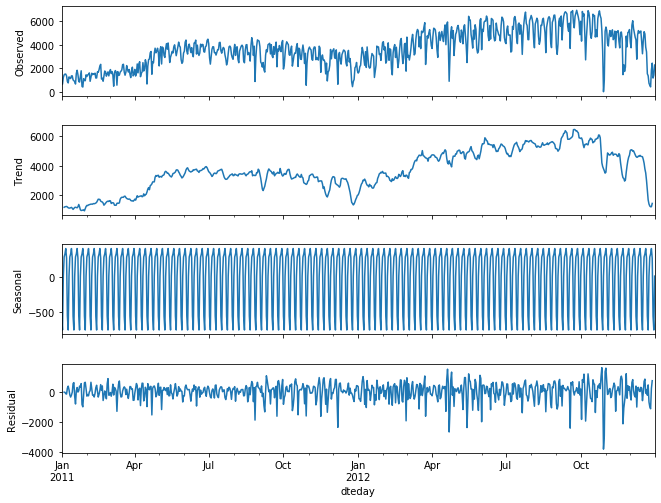

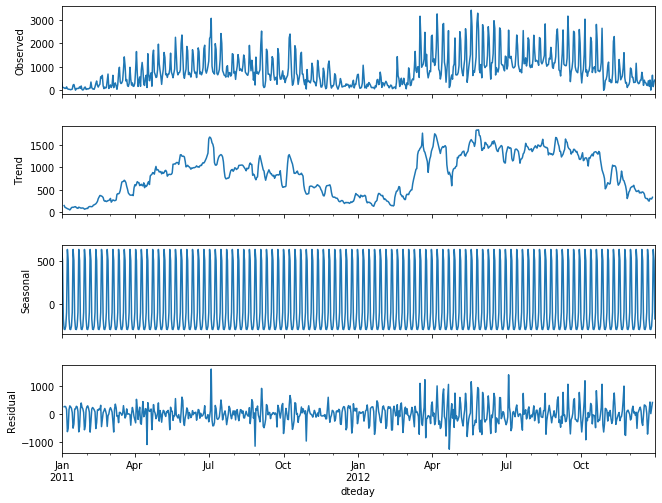

In [0]:
# plot decompositions
registered_plot = registered_decomposition.plot()
registered_plot.set_size_inches(10, 8)

casual_plot = casual_decomposition.plot()
casual_plot.set_size_inches(10, 8)

registered_plot.savefig('figs/registered_decomposition.png', format='png')
casual_plot.savefig('figs/casual_decomposition.png', format='png')

<Figure size 432x288 with 0 Axes>

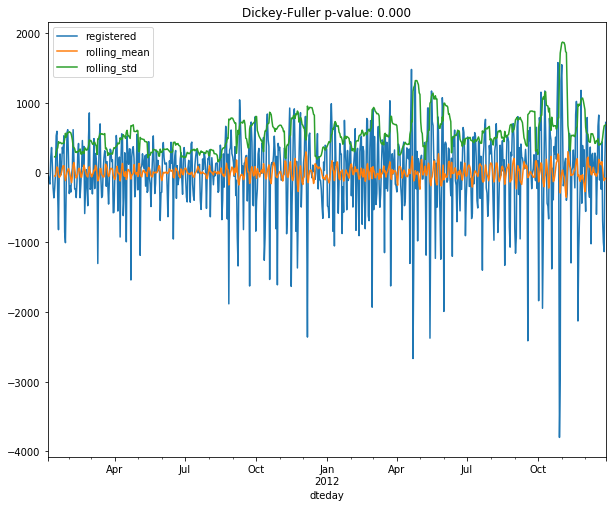

In [0]:
# test residuals for stationarity
plt.figure()
test_stationarity(registered_decomposition.resid.dropna(), figsize=(10, 8))
plt.savefig('figs/registered_resid.png', format='png')